[[7. 7. 7. 7. 7.]
 [7. 7. 7. 7. 7.]
 [7. 7. 7. 7. 7.]
 [7. 7. 7. 7. 7.]
 [7. 7. 7. 7. 7.]]


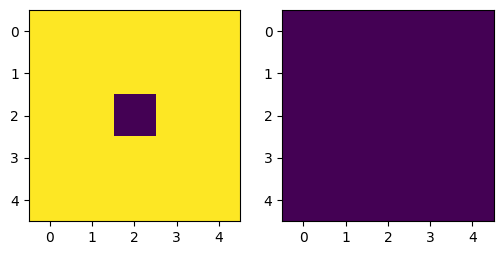

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import sys

N = 7
T = 0
R = 0.9
P = 1
S = 1.5
timesteps = 20

lattice_size = 5
lattice = np.ones((lattice_size,lattice_size))*N
lattice[int(lattice_size/2),int(lattice_size/2)] = 0
new_lattice = lattice.copy()

fig, axs = plt.subplots(1,2,figsize=(6,6))
axs[0].imshow(lattice)


def play_game(self_strat, neighbor_strat):

    coop = True
    defect = False
    self_previous = coop
    neighbor_previous = coop
    punishment = 0

    for round in range(1,N+1):

        if round <= self_strat and neighbor_previous == coop:
            self_action = coop
        else:
            self_action = defect

        if round <= neighbor_strat and self_previous == coop:
            neighbor_action = coop
        else:
            neighbor_action = defect

        if self_action == coop and neighbor_action == coop:
            punishment += R
        elif self_action == coop and neighbor_action == defect:
            punishment += S
        elif self_action == defect and neighbor_action == coop:
            punishment += T
        elif self_action == defect and neighbor_action == defect:
            punishment += P

        self_previous = self_action
        neighbor_previous = neighbor_action

    return punishment



lattice[int(lattice_size/2+1),int(lattice_size/2+1)] = 0
for t in range(1,timesteps):

    # Iterate over every agent i,j
    for i in range(lattice_size):
        for j in range(lattice_size):

            # Punishment for Von Neumann neighbors and self
            strat_self = lattice[i,j]
            pSelf = play_game(strat_self, strat_self)

            if i > 0:
                strat_up = lattice[i-1,j]
                pUp = play_game(strat_self, strat_up)
            else:
                pUp = np.inf

            if i < lattice_size-1:
                strat_down = lattice[i+1,j]
                pDown = play_game(strat_self, strat_down)
            else:
                pDown = np.inf

            if j > 0:
                pRight = play_game(strat_self, strat_left)
                strat_left = lattice[i,j-1]
            else:
                pRight = np.inf

            if j < lattice_size-1:
                strat_right = lattice[i,j+1]
                pLeft = play_game(strat_self, strat_right)
            else:
                pLeft = np.inf

            rand_strat = []
            pMin = np.min([pSelf,pUp,pDown,pRight,pLeft])
            if pMin == pSelf:
                rand_strat.append(strat_self)
            if pMin == pUp:
                rand_strat.append(strat_up)
            if pMin == pDown:
                rand_strat.append(strat_down)
            if pMin == pLeft:
                rand_strat.append(strat_left)
            if pMin == pRight:
                rand_strat.append(strat_right)
            
            rand_i = np.random.randint(1, len(rand_strat))
            new_lattice[i,j] = rand_strat[rand_i]

    lattice = new_lattice.copy()

print(lattice)

axs[1].imshow(lattice)
plt.savefig('exercise_13.2a_1def.png', bbox_inches='tight')
plt.show()





